In [4]:
!pip install openai python-dotenv

In [5]:
import dotenv
import openai
import re
dotenv.load_dotenv('../.env')

True

In [6]:
hero_name = "Philippe"
story_idea = "une jeune sorcière en formation qui doit prouver ses compétences en sauvant son village d'un sortilège maléfique"
instructions = """
Consignes:
Un chapitre doit être court et se terminer par un cliffhanger.
Un Chapitre est divisé en plusieurs court paragraphes.
Un paragraphes contient Deux phrases au maximum."""
imagen_instructions = """-----
Write a very short one sentence visual description of the scene. Include a very short description of the character and its environnement. Keep it short and simple."""

In [7]:
def generate_prompt(story_idea, hero_name, instructions):
    prompt = f"""Ecris une histoire pour enfant composée de 5 chapitres.
{story_idea}
Personnage principal: {hero_name}
{instructions}
"""
    return prompt

In [8]:
def generate_story(story_idea, hero_name, instructions):
    prompt = generate_prompt(story_idea, hero_name, instructions)
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role":"user", "content": prompt}]
    )
    full_text = response.choices[0].message.content
    return full_text

In [9]:
story = generate_story(story_idea, hero_name, instructions)
print(story)

Chapitre 1: Léa et son rêve de devenir sorcière

Léa était une petite fille ordinaire, mais elle rêvait de devenir une sorcière puissante. Chaque nuit, elle s'endormait en imaginant des sorts spectaculaires et des potions magiques. Un matin, alors qu'elle se réveillait, une lettre mystérieuse glissa par la fente de sa porte. Elle était invitée à rejoindre l'école des sorciers pour y suivre sa formation. Léa était remplie de joie, mais elle savait qu'elle devait prouver ses compétences pour gagner sa place. Quelle épreuve l'attendait-elle ?

Chapitre 2: Le premier test inattendu

Léa se rendit à l'école des sorciers, pleine d'excitation et de nervosité. Elle fut accueillie par le professeur Merlin, qui lui dit qu'elle devait prouver sa valeur en sauvant son propre village d'un sortilège maléfique. Elle n'avait aucune idée de ce qui l'attendait, mais elle était déterminée à réussir. Elle se prépara pour sa première épreuve avec courage et détermination.

Chapitre 3: Le pouvoir des épreuv

In [10]:

def format_raw_story(story):

    # split story into chapters
    pattern = r"(Chapitre \d+: [^\n]+)\n\n(.*?)(?=\n\nChapitre|$)"

    # Find all matches
    story_by_chapters = re.findall(pattern, story, re.DOTALL)

    # Split the chapters into paragraphs of at least 100 characters
    story_by_chapters_and_paragraphs = []
    for chapter in story_by_chapters:
        chapter_title = chapter[0]
        chapter_content = chapter[1]
        chapter_content_splited = []
        for sentence in chapter_content.split("."):
            sentence = sentence.strip()
            if sentence == "": continue
            if len(chapter_content_splited) == 0:
                chapter_content_splited.append(sentence)
            elif len(chapter_content_splited[-1]) < 100:
                chapter_content_splited[-1] += f". {sentence}"
            else:
                chapter_content_splited.append(sentence)
        story_by_chapters_and_paragraphs.append((chapter_title, chapter_content_splited))
    
    return story_by_chapters_and_paragraphs

In [11]:
formated_story = format_raw_story(story)

In [12]:
formated_story

[('Chapitre 1: Léa et son rêve de devenir sorcière',
  ["Léa était une petite fille ordinaire, mais elle rêvait de devenir une sorcière puissante. Chaque nuit, elle s'endormait en imaginant des sorts spectaculaires et des potions magiques",
   "Un matin, alors qu'elle se réveillait, une lettre mystérieuse glissa par la fente de sa porte. Elle était invitée à rejoindre l'école des sorciers pour y suivre sa formation",
   "Léa était remplie de joie, mais elle savait qu'elle devait prouver ses compétences pour gagner sa place",
   "Quelle épreuve l'attendait-elle ?"]),
 ('Chapitre 2: Le premier test inattendu',
  ["Léa se rendit à l'école des sorciers, pleine d'excitation et de nervosité. Elle fut accueillie par le professeur Merlin, qui lui dit qu'elle devait prouver sa valeur en sauvant son propre village d'un sortilège maléfique",
   "Elle n'avait aucune idée de ce qui l'attendait, mais elle était déterminée à réussir. Elle se prépara pour sa première épreuve avec courage et déterminat

In [13]:
def text_to_images_desc(chapter_content):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role":"user", "content": f"""{chapter_content}
{imagen_instructions}"""}
                  ],
        max_tokens=50
    )
    full_text = response.choices[0].message.content
    return full_text

                   
    

In [14]:
story_with_images_desc = list()
for i, chapter in enumerate(formated_story):
    chapter_title = chapter[0]
    chapter_content = chapter[1]
    chapter_item = dict()
    chapter_item['chapter_title'] = chapter_title
    chapter_item['paragraphs'] = list()
    print(chapter_title)
    for j, paragraph_text in enumerate(chapter_content):
        paragraph_item = dict()
        paragraph_item['text'] = paragraph_text
        paragraph_item['image_desc'] = text_to_images_desc(paragraph_text)
        chapter_item['paragraphs'].append(paragraph_item)
    story_with_images_desc.append(chapter_item)
story_with_images_desc
        
        


Chapitre 1: Léa et son rêve de devenir sorcière


Chapitre 2: Le premier test inattendu
Chapitre 3: Le pouvoir des épreuves
Chapitre 4: La révélation des vérités
Chapitre 5: La victoire finale


[{'chapter_title': 'Chapitre 1: Léa et son rêve de devenir sorcière',
  'paragraphs': [{'text': "Léa était une petite fille ordinaire, mais elle rêvait de devenir une sorcière puissante. Chaque nuit, elle s'endormait en imaginant des sorts spectaculaires et des potions magiques",
    'image_desc': 'A little girl named Léa, surrounded by books of spells and cauldrons, dreams of becoming a powerful witch.'},
   {'text': "Un matin, alors qu'elle se réveillait, une lettre mystérieuse glissa par la fente de sa porte. Elle était invitée à rejoindre l'école des sorciers pour y suivre sa formation",
    'image_desc': "Une jeune femme se tient dans une chambre paisible à la lumière douce du matin, alors qu'une lettre mystérieuse glisse silencieusement sous sa porte."},
   {'text': "Léa était remplie de joie, mais elle savait qu'elle devait prouver ses compétences pour gagner sa place",
    'image_desc': 'Léa, a joyful individual, in a determined stance, ready to showcase her skills in order to 

# Gen images

# dl models

In [15]:
!mkdir -p models/image_encoder
!wget -P models https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter-plus-face_sdxl_vit-h.bin
!wget -O models/image_encoder/pytorch_model.bin https://huggingface.co/h94/IP-Adapter/resolve/main/models/image_encoder/pytorch_model.bin
!wget -O models/image_encoder/config.json       https://huggingface.co/h94/IP-Adapter/resolve/main/models/image_encoder/config.json

--2023-11-19 14:17:12--  https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter-plus-face_sdxl_vit-h.bin
Resolving huggingface.co (huggingface.co)... 52.84.90.33, 52.84.90.129, 52.84.90.106, ...
Connecting to huggingface.co (huggingface.co)|52.84.90.33|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/6f/e5/6fe5d8840a1ab462e1b9f52fbeabac6bb30febaf56fb5a439f08cca6d1cf4372/50e886d82940b3c5873d80c2b06d8a4b0d0fccec70bc44fd53f16ac3cfd7fc36?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27ip-adapter-plus-face_sdxl_vit-h.bin%3B+filename%3D%22ip-adapter-plus-face_sdxl_vit-h.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1700661985&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwMDY2MTk4NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy82Zi9lNS82ZmU1ZDg4NDBhMWFiNDYyZTFiOWY1MmZiZWFiYWM2YmIzMGZlYmFmNTZmYjVhNDM5ZjA4

In [16]:
!pip install accelerate diffusers==0.22.1 accelerate transformers einops git+https://github.com/tencent-ailab/IP-Adapter.git

  Cloning https://github.com/tencent-ailab/IP-Adapter.git to /tmp/pip-req-build-nyy26ql7
  Running command git clone --filter=blob:none --quiet https://github.com/tencent-ailab/IP-Adapter.git /tmp/pip-req-build-nyy26ql7
  Resolved https://github.com/tencent-ailab/IP-Adapter.git to commit e317f750e1829e846c944b9fdd7a2f2842c46501
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [17]:
import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image

from ip_adapter import IPAdapterPlusXL
from ip_adapter.custom_pipelines import StableDiffusionXLCustomPipeline


In [18]:
image = Image.open("my_phil_ip.png")

In [19]:
# load SDXL pipeline
pipe = StableDiffusionXLCustomPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    add_watermarker=False,
)
# load ip-adapter
ip_model = IPAdapterPlusXL(pipe, "models/image_encoder", 
                           "./models/ip-adapter-plus-face_sdxl_vit-h.bin", 
                           "cuda", num_tokens=16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [21]:
def generate_picture(image, image_desc):
    prompt = f"{image_desc}, in a children cartoon style."
    images = ip_model.generate(pil_image=image, num_samples=1, num_inference_steps=30,
                           prompt=prompt, scale=0.4)
    return images[0]

In [23]:

def add_pictures_to_story(story_with_images_desc, image):

    for chapter in story_with_images_desc:
        print(f'done with chapter {chapter["chapter_title"]}')
        for paragraph in chapter['paragraphs']:
            paragraph['image'] = generate_picture(image, paragraph['image_desc'])
    return story_with_images_desc

In [24]:
story_with_images_desc = add_pictures_to_story(story_with_images_desc, image)

  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 1: Léa et son rêve de devenir sorcière paragraph Léa était une petite fille ordinaire, mais elle rêvait de devenir une sorcière puissante. Chaque nuit, elle s'endormait en imaginant des sorts spectaculaires et des potions magiques


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 1: Léa et son rêve de devenir sorcière paragraph Un matin, alors qu'elle se réveillait, une lettre mystérieuse glissa par la fente de sa porte. Elle était invitée à rejoindre l'école des sorciers pour y suivre sa formation


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 1: Léa et son rêve de devenir sorcière paragraph Léa était remplie de joie, mais elle savait qu'elle devait prouver ses compétences pour gagner sa place


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 1: Léa et son rêve de devenir sorcière paragraph Quelle épreuve l'attendait-elle ?


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 2: Le premier test inattendu paragraph Léa se rendit à l'école des sorciers, pleine d'excitation et de nervosité. Elle fut accueillie par le professeur Merlin, qui lui dit qu'elle devait prouver sa valeur en sauvant son propre village d'un sortilège maléfique


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 2: Le premier test inattendu paragraph Elle n'avait aucune idée de ce qui l'attendait, mais elle était déterminée à réussir. Elle se prépara pour sa première épreuve avec courage et détermination


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 3: Le pouvoir des épreuves paragraph Léa entra dans son village, maintenant couvert d'une épaisse brume magique. Elle se fraya un chemin à travers les rues sombres et sinistres, cherchant des indices sur le sortilège maléfique


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 3: Le pouvoir des épreuves paragraph Soudain, elle entendit un bruit mystérieux venant de derrière elle. Elle se retourna et vit une horde de corbeaux sombres qui s'envolèrent du sol


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 3: Le pouvoir des épreuves paragraph Ils semblaient vouloir l'empêcher d'avancer. Léa sut alors que les épreuves ne seraient pas faciles, mais elle était prête à affronter tous les obstacles pour sauver son village bien-aimé


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 4: La révélation des vérités paragraph Léa découvrit que le sortilège maléfique avait été jeté par une sorcière jalouse qui enviait son talent


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 4: La révélation des vérités paragraph Elle comprit alors qu'elle devait trouver un moyen de la vaincre pour briser le sort. Elle se retrouva dans une bataille magique avec la sorcière, utilisant tous ses sorts et ses potions pour la neutraliser


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 4: La révélation des vérités paragraph Mais la sorcière était puissante et elle lança un sortilège qui l'emprisonna dans une cage de cristal


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 4: La révélation des vérités paragraph Léa se demandait comment elle pourrait s'en sortir maintenant


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 5: La victoire finale paragraph Alors qu'elle était prisonnière, Léa se souvint de toutes les leçons qu'elle avait apprises à l'école des sorciers


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 5: La victoire finale paragraph Elle utilisa sa créativité et sa persévérance pour créer un sortilège de sauvetage. La cage de cristal commença à se fissurer puis à se briser en mille morceaux


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 5: La victoire finale paragraph Léa était libre et prête à affronter la sorcière jalouse une dernière fois. Elle lança son sortilège le plus puissant, emprisonnant la sorcière maléfique à son tour


  0%|          | 0/30 [00:00<?, ?it/s]

done with chapter Chapitre 5: La victoire finale paragraph Le village était sauvé et Léa avait prouvé qu'elle était une sorcière talentueuse. Elle était maintenant prête à continuer sa formation et à réaliser tous ses rêves magiques


# Create story album

In [1]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 3.4 MB/s eta 0:00:00 0:00:01


In [28]:
from docx import Document
from docx.shared import Inches
from io import BytesIO

In [32]:
document = Document()
for chapter in story_with_images_desc:
    document.add_heading(chapter['chapter_title'], level=1)
    for paragraph in chapter['paragraphs']:
        document.add_paragraph(paragraph["text"])
        image_buffer = BytesIO()
        paragraph['image'].save(image_buffer, format='png')
        document.add_picture(image_buffer, width=Inches(6.0))
        document.add_page_break()
document.save('story.docx')



In [1]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

In [16]:
def create_text_image(text, image_width, image_height, font_size=20, line_width=20):
    # Create a blank image with white background
    image = Image.new('RGB', (image_width, image_height), color='white')
    draw = ImageDraw.Draw(image)
    # Load a font
    font = ImageFont.load_default(size=font_size)
    
    # Initial position
    y_text = 0

    # Split the text into lines that fit the image width
    for line in textwrap.wrap(text, width=line_width):
        # Draw the line on the image
        draw.text((0, y_text), line, font=font, fill='black')

        # Update the Y position for the next line
        y_text += font_size

    return image

def concat_images(image_left, image_right):
    total_width = image_left.width + image_right.width
    max_height = max(image_left.height, image_right.height)
    
    new_image = Image.new('RGB', (total_width, max_height))
    new_image.paste(image_left, (0, 0))
    new_image.paste(image_right, (image_left.width, 0))

    return new_image

In [ ]:
image_album = []
for chapter in story_with_images_desc:
    for i, paragraph in enumerate(chapter['paragraphs']):
        text = paragraph['text']
        if i == 0:
            text = chapter['chapter_title'] + "\n" + text
        concat_image = concat_images(create_text_image(text, 400, 1024), paragraph['image'])

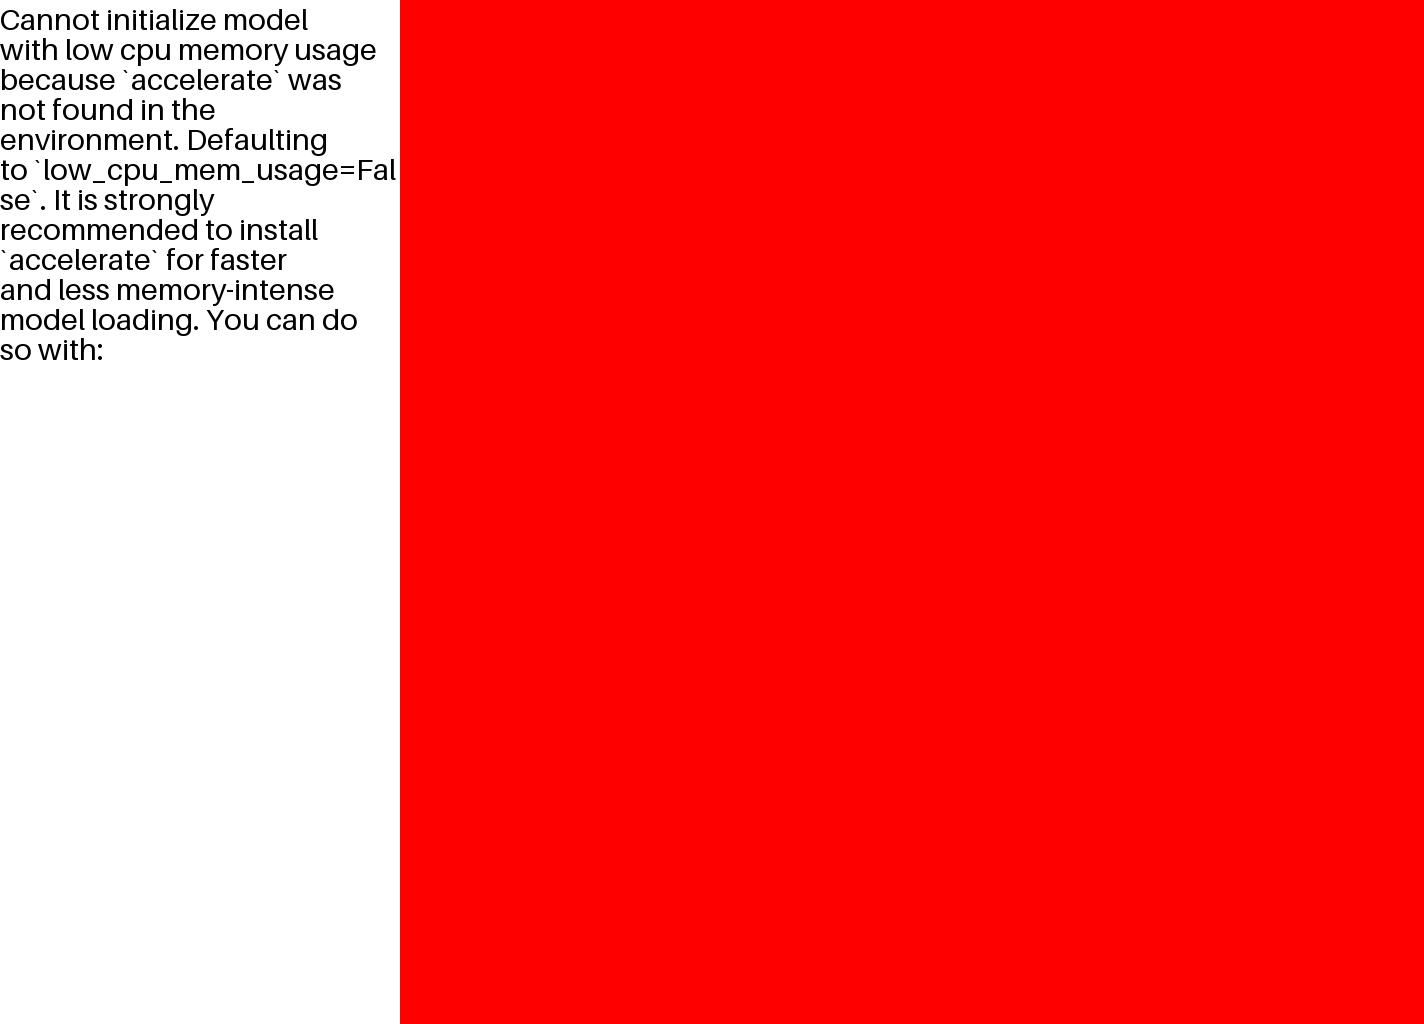

In [20]:
text = "Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: "
base_image = Image.new('RGB', (1024, 1024), color='red')
# side_image = Image.new('RGB', (400, 1024), color='blue')
concat_images(create_text_image(text, 400, 1024, font_size=30, line_width=25), base_image)


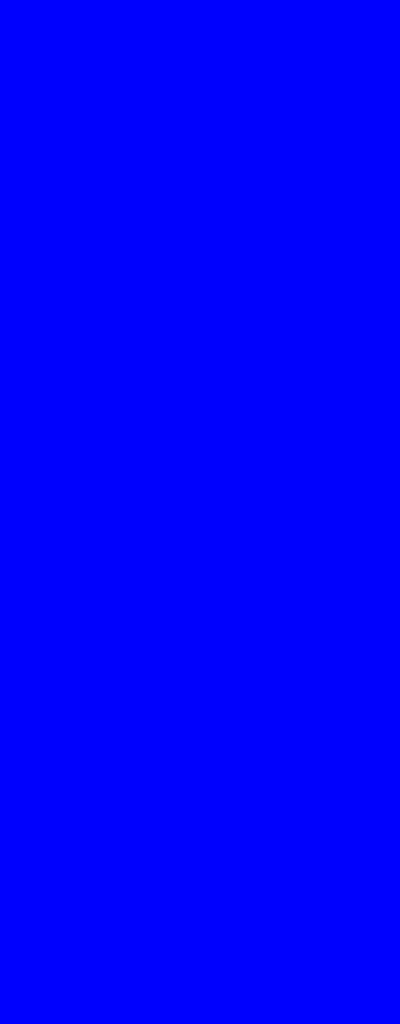

In [25]:
side_image